<a href="https://colab.research.google.com/github/irahanjose/Aprendizaje-de-M-quina-con-Python/blob/main/regresion_lineal_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal: implementación en Keras

## 1. Configuración Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
ruta = '/gdrive/MyDrive/Colab Notebooks/01_2021-07-FundamentosDL/1.7/dataset.csv'

## 2. Lectura y visualización del set de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
np.random.seed(25)
tf.random.set_seed(25)

In [ ]:
data = pd.read_csv(ruta)

In [ ]:
data.head()

,Area,Precio
0,152.272727,65928.86015
1,102.272727,44477.41849
2,222.727273,95848.62198
3,79.545455,44964.89827
4,86.363636,34367.39122


In [ ]:
data.shape

(100, 2)

In [ ]:
x = data['Area'].values
y = data['Precio'].values

Text(0, 0.5, 'y (precio (en U$)')

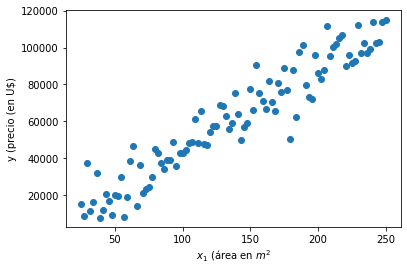

In [ ]:
plt.scatter(x,y)
plt.xlabel('$x_1$ (área en $m^2$')
plt.ylabel('y (precio (en U$)')

## 3. Construir el modelo lineal en Keras

In [ ]:
# Contenedor vacío
modelo = Sequential()

In [ ]:
# Comenzar a llenar el modelo ('add')
modelo.add(Dense(1, activation='linear', input_shape=((1,))))

In [ ]:
# Información del modelo y = wx + b
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 4. Optimizador (Gradiente Descendente Estocástico) y pérdida

In [ ]:
lr = 0.00001
optimizador = SGD(learning_rate=lr)
modelo.compile(optimizer=optimizador, loss='mse')

## 5. Entrenamiento y predicción

In [ ]:
n_epochs = 20
s_minibatches = 10 # Probar con diferentes batch_sizes
historia = modelo.fit(x,y,epochs=n_epochs,batch_size=s_minibatches,verbose=1)

Epoch 1/20
10/10 [==============================] - 0s 1ms/step - loss: 793056640.0000
Epoch 2/20
10/10 [==============================] - 0s 2ms/step - loss: 88015680.0000
Epoch 3/20
10/10 [==============================] - 0s 2ms/step - loss: 90311944.0000
Epoch 4/20
10/10 [==============================] - 0s 2ms/step - loss: 90005792.0000
Epoch 5/20
10/10 [==============================] - 0s 2ms/step - loss: 87927200.0000
Epoch 6/20
10/10 [==============================] - 0s 2ms/step - loss: 92732120.0000
Epoch 7/20
10/10 [==============================] - 0s 2ms/step - loss: 88902216.0000
Epoch 8/20
10/10 [==============================] - 0s 2ms/step - loss: 88999984.0000
Epoch 9/20
10/10 [==============================] - 0s 1ms/step - loss: 88838648.0000
Epoch 10/20
10/10 [==============================] - 0s 2ms/step - loss: 90567272.0000
Epoch 11/20
10/10 [==============================] - 0s 2ms/step - loss: 88884088.0000
Epoch 12/20
10/10 [==============================] 

### 5.1 Comportamiento del error

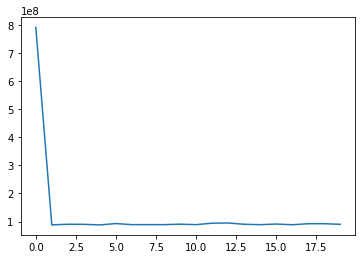

In [ ]:
plt.plot(historia.history['loss'])

### 5.2 Predicción

Text(0, 0.5, 'y (precio (en U$)')

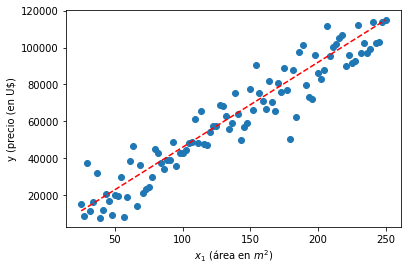

In [ ]:
# Dibujar recta resultante
x_pred = np.linspace(x.min(),x.max(),x.shape[0])
y_pred = modelo.predict(x_pred)

plt.scatter(x,y)
plt.plot(x_pred,y_pred,'r--')
plt.xlabel('$x_1$ (área en $m^2$)')
plt.ylabel('y (precio (en U$)')